In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [2]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\insurance.csv")
data = data.sample(frac = 1)
data.columns = data.columns.astype(str)

le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])

one_hot = pd.get_dummies(data['region'],dtype="int")
data = data.drop('region',axis = 1)
data = data.join(one_hot)

#Splitting
y = data["charges"]
X = data.drop("charges", axis=1)

st = StandardScaler()
X = st.fit_transform(X)

#Scaling and Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(1070, 9)


In [3]:
#ML
model = Sequential()
model.add(Dense(units=8, input_shape=(9,), activation="relu"))
model.add(Dense(units=4, activation="relu"))
model.add(Dense(units=1))

model.compile(loss="mean_absolute_error", optimizer="adam", metrics="mean_absolute_error")

history = model.fit(X_train,y_train,epochs=1000,batch_size=64,validation_split=0.1)

_,loss = model.evaluate(X_test,y_test)
print('Mean Absolute Error: %.2f' % loss)

Epoch 1/1000
16/16 [==============================] - 1s 16ms/step - loss: 13356.5029 - mean_absolute_error: 13356.5029 - val_loss: 14200.5400 - val_mean_absolute_error: 14200.5400
Epoch 2/1000
16/16 [==============================] - 0s 4ms/step - loss: 13356.3311 - mean_absolute_error: 13356.3311 - val_loss: 14200.3643 - val_mean_absolute_error: 14200.3643
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 13356.1533 - mean_absolute_error: 13356.1533 - val_loss: 14200.1738 - val_mean_absolute_error: 14200.1738
Epoch 4/1000
16/16 [==============================] - 0s 4ms/step - loss: 13355.9609 - mean_absolute_error: 13355.9609 - val_loss: 14199.9697 - val_mean_absolute_error: 14199.9697
Epoch 5/1000
16/16 [==============================] - 0s 4ms/step - loss: 13355.7559 - mean_absolute_error: 13355.7559 - val_loss: 14199.7432 - val_mean_absolute_error: 14199.7432
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 13355.5303 - mean_absolut

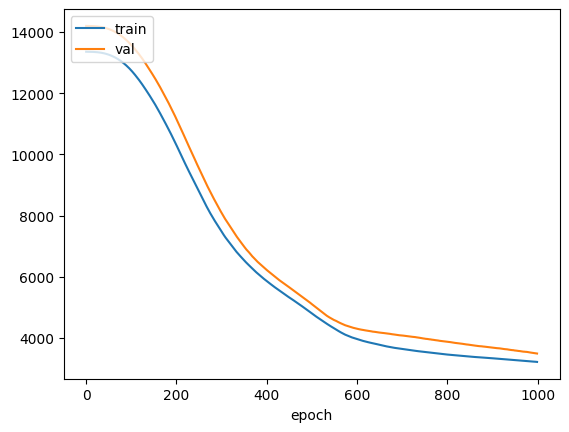

In [4]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()